<a href="https://colab.research.google.com/github/palashpaunikar/Hello-World/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from google.colab import files
uploaded = files.upload() 

Saving dataset.csv to dataset (1).csv


In [26]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
column_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[column_to_scale] = StandardScaler.fit_transform(dataset[column_to_scale])


In [33]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [34]:
y = dataset['target']
x = dataset.drop(['target'],axis = 1)

In [42]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  score=cross_val_score( knn_classifier,x,y,cv=10)
  knn_score.append(score.mean())

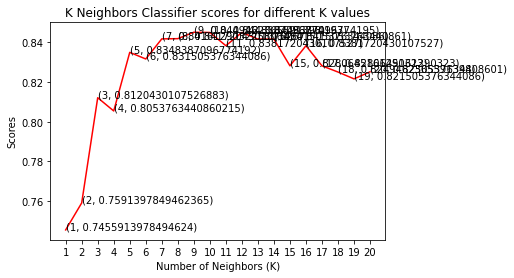

In [43]:
plt.plot([k for k in range(1,21)], knn_score, color = 'red')
for i in range(1,21):
  plt.text(i,knn_score[i-1], (i, knn_score[i-1]))
  plt.xticks([i for i in range(1,21)])
  plt.xlabel('Number of Neighbors (K)')
  plt.ylabel('Scores')
  plt.title('K Neighbors Classifier scores for different K values')

In [45]:
knnn_classifier = KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [46]:
score.mean()

0.8250537634408601